# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Haffidz Aimar Maulana
- **Email:** haffidz.aimar.maulana.tik22@mhsw.pnj.ac.id
- **ID Dicoding:** aimarmln

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca untuk setiap musim terhadap penyewaan sepeda?
- Bagaimana pengaruh waktu (pagi, siang, sore, malam) terhadap penyewaan sepeda?
- Bagaimana perbandingan user yang casual dan yang registered?

## Import Semua Packages/Library yang Digunakan

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [93]:
# Mengambil data penyewaan berdasarkan jam
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [94]:
# Mengambil data penyewaan berdasarkan hari
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Memiliki 16 kolom
- Kedua dataset memiliki kolom yang sama kecuali hour.csv memiliki satu kolom tambahan yaitu hr

### Assessing Data

- Menilai data hour_df

In [95]:
# Mengecek kolom dan tipe data dari hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [96]:
# Mengecek jumlah baris yang tidak memiliki value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [97]:
# Mengecek jumlah baris yang terduplikasi
dup = hour_df.duplicated().sum()
print(f"Jumlah baris yang terduplikasi: {dup}")

Jumlah baris yang terduplikasi: 0


In [98]:
# Cek parameter statistik
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Kolom dteday seharusnya bertipe datetime
- Tidak ada data yang hilang (null)
- Tidak ada data yang terduplikasi

- Menilai data day_df

In [99]:
# Mengecek kolom dan tipe data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [100]:
# Mengecek data yang tidak memiliki value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [101]:
# Mengecek data yang terduplikasi
dup = day_df.duplicated().sum()
print(f"Jumlah baris yang terduplikasi: {dup}") 

Jumlah baris yang terduplikasi: 0


In [102]:
# Mengecek parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Sama dengan hour_df, kolom dteday seharusnya bertipe datetime
- Sama lagi dengan hour_df, tidak ada data yang hilang (null)
- Tidak ada data yang terduplikasi, sama dengan hour_df
- Tambahkan kolom time_of_day yang menyatakan Morning, Afternoon, Evening, Night

### Cleaning Data

- merubah tipe data string menjadi date untuk kolom dteday

In [103]:
dfs = [hour_df, day_df]
for df in dfs:
    df["dteday"] = pd.to_datetime(df["dteday"])

In [104]:
# Cek tipe data
for df in dfs:
    df_dteday_type = df["dteday"].dtype
    print(df_dteday_type)

datetime64[ns]
datetime64[ns]


- Merubah value dari kolom season dan weathersit agar lebih terbaca

In [105]:
# definisikan fungsi fungsi untuk merubah kolom
def convert_season(season):
    if season == 1:
        return "Springer"
    if season == 2:
        return "Summer"
    if season == 3:
        return "Fall"
    if season == 4:
        return "Winter"

def convert_weathersit(weathersit):
    if weathersit == 1:
        return "Clear/Sunny"
    if weathersit == 2:
        return "Cloudy/Misty"
    if weathersit == 3:
        return "Rainy/Showers"
    if weathersit == 4:
        return "Stormy/Severe Weather"

In [106]:
# Apply ke semua dataframe
for df in dfs:
    df["season"] = df["season"].apply(convert_season)
    df["weathersit"] = df["weathersit"].apply(convert_weathersit)

In [107]:
# Cek ke semua dataframe
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15837,15838,2012-10-27,Winter,1,10,2,0,6,0,Cloudy/Misty,0.50,0.4848,0.88,0.1940,19,71,90
9497,9498,2012-02-05,Springer,1,2,15,0,0,0,Cloudy/Misty,0.30,0.2879,0.56,0.2537,55,217,272
17368,17369,2012-12-31,Springer,1,12,13,0,1,1,Cloudy/Misty,0.26,0.2576,0.44,0.1642,38,165,203
10147,10148,2012-03-03,Springer,1,3,21,0,6,0,Clear/Sunny,0.46,0.4545,0.19,0.3284,24,130,154
3566,3567,2011-06-02,Summer,0,6,12,0,4,1,Clear/Sunny,0.76,0.6667,0.25,0.4627,39,193,232


In [108]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
385,386,2012-01-21,Springer,1,1,0,6,0,Cloudy/Misty,0.173333,0.174875,0.831250,0.222642,67,1234,1301
663,664,2012-10-25,Winter,1,10,0,4,1,Cloudy/Misty,0.550000,0.529688,0.800417,0.124375,875,6484,7359
570,571,2012-07-24,Fall,1,7,0,2,1,Clear/Sunny,0.750833,0.706450,0.655000,0.211454,1140,6452,7592
474,475,2012-04-19,Summer,1,4,0,4,1,Clear/Sunny,0.498333,0.493046,0.612500,0.065929,846,5719,6565
292,293,2011-10-20,Winter,0,10,0,4,1,Clear/Sunny,0.475833,0.466525,0.636250,0.422275,471,3724,4195


- Tambahkan kolom yang menentukan Morning, Afternoon, Evening, atau Night

Asumsi saya yaitu:
- Morning (6-11)
- Afternoon (12-14)
- Evening (15-18)
- Night (19-5)

In [109]:
# Buat fungsi konversi
def get_time_of_day(hour):
    if 6 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 15:
        return "Afternoon"
    elif 16 <= hour <= 18:
        return "Evening"
    else:
        return "Night"

In [110]:
# Tambahkan kolom baru di hour_df
hour_df["time_of_day"] = hour_df["hr"].apply(get_time_of_day)

In [111]:
hour_df[["hr", "time_of_day"]].sample(5)

,hr,time_of_day
199,14,Afternoon
1462,6,Morning
14914,15,Afternoon
12113,22,Night
11082,23,Night


**Insight:**
- Kolom dteday untuk kedua dataframe sudah dikonversi menjadi datetime
- Kolom season dan weathersit sudah dikonversi menjadi teks
- Ditambahkan kolom baru yang menerangkan waktu dalam hari

## Exploratory Data Analysis (EDA)

### Explore ...

Pengaruh cuaca untuk setiap musim

In [112]:
# Jumlah penyewa setiap season
day_df.groupby(by="season")["cnt"].sum().sort_values(ascending=False).reset_index()

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Springer,471348


In [113]:
# Jumlah penyewa setiap cuaca
day_df.groupby(by="weathersit")["cnt"].sum().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,Clear/Sunny,2257952
1,Cloudy/Misty,996858
2,Rainy/Showers,37869


In [114]:
# Pengaruh cuaca untuk setiap musim 
day_df.groupby(by=["season", "weathersit"]).agg({
    "cnt": "sum"
})

cnt
season   weathersit           
Fall     Clear/Sunny    799443
         Cloudy/Misty   250679
         Rainy/Showers   11007
Springer Clear/Sunny    312036
         Cloudy/Misty   155573
         Rainy/Showers    3739
Summer   Clear/Sunny    626986
         Cloudy/Misty   288096
         Rainy/Showers    3507
Winter   Clear/Sunny    519487
         Cloudy/Misty   302510
         Rainy/Showers   19616

- Pengaruh waktu hari dalam penyewaan sepeda

In [115]:
time_order = ["Morning", "Afternoon", "Evening", "Night"]
hour_df["time_of_day"] = pd.Categorical(hour_df["time_of_day"], categories=time_order, ordered=True)

hour_df.groupby(by="time_of_day")["cnt"].sum().reset_index()

,time_of_day,cnt
0,Morning,907319
1,Afternoon,728134
2,Evening,874380
3,Night,782846


- Perbandingan user yang casual dan yang registered

In [116]:
total_casual = day_df["casual"].sum()
total_registered = day_df["registered"].sum()

comparison_df = pd.DataFrame({
    "Type": ["Casual", "Registered"],
    "Count": [total_casual, total_registered]
})

comparison_df

,Type,Count
0,Casual,620017
1,Registered,2672662


**Insight:**
- Tidak ada cuaca yang berkategori 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
- Penyewaan paling banyak di musim fall
- Penyewaan juga paling banyak di cuaca cerah
- Waktu pagi dan waktu sore merupakan waktu dimana orang paling banyak menyewa sepeda
- User yang sudah register aplikasi jauh lebih banyak dibandingkan user yang tidak register (casual)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca untuk setiap musim terhadap penyewaan sepeda?

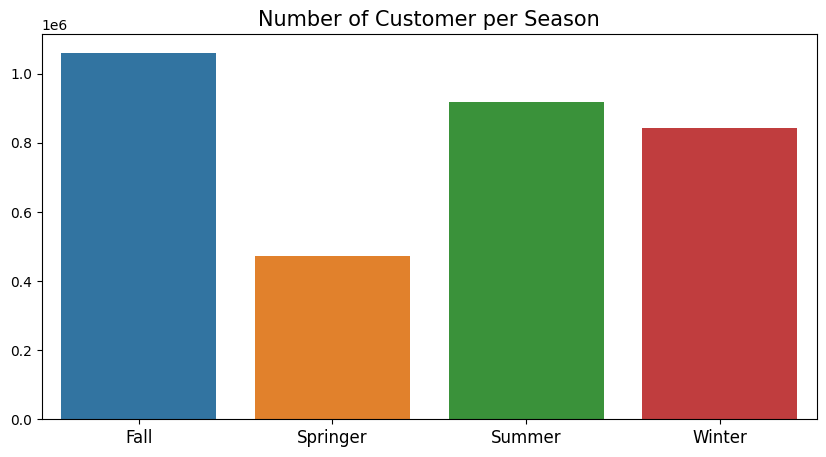

In [117]:
byseason_df = day_df.groupby(by="season")["cnt"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=byseason_df,
    x="season",
    y="cnt"
)
plt.title("Number of Customer per Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

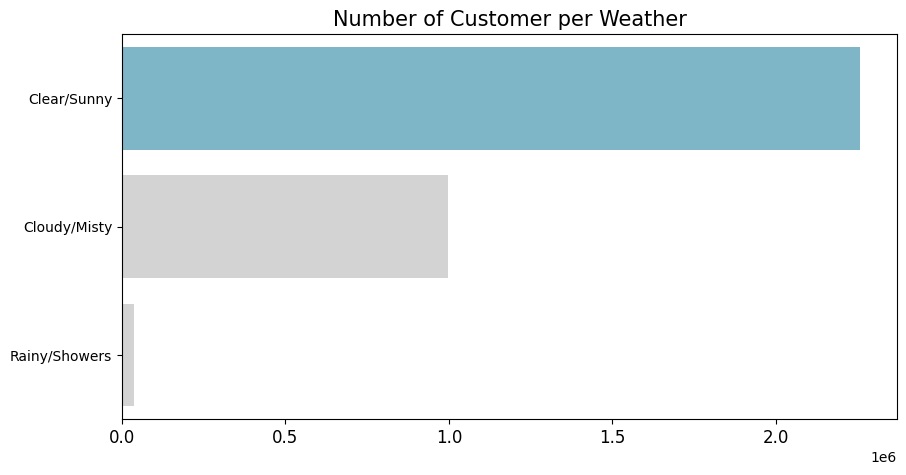

In [118]:
byweathersit_df = day_df.groupby(by="weathersit")["cnt"].sum().reset_index()
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))
sns.barplot(
    data=byweathersit_df.sort_values(by="cnt", ascending=False),
    x="cnt",
    y="weathersit",
    palette=colors
)
plt.title("Number of Customer per Weather", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh waktu (pagi, siang, sore, malam) terhadap penyewaan sepeda?

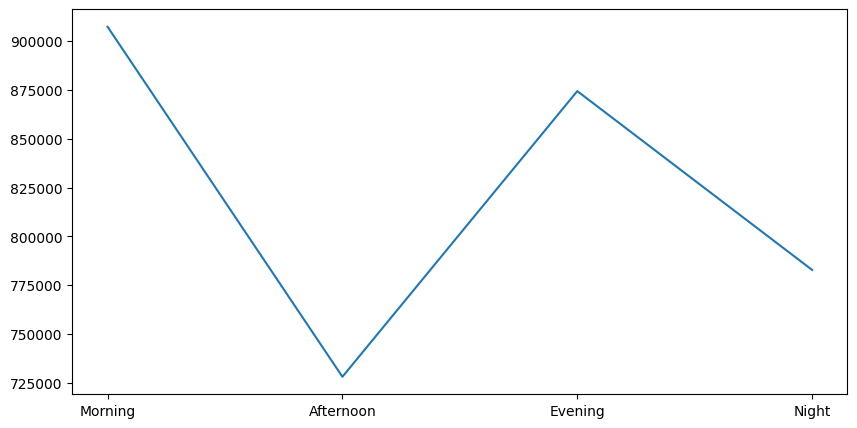

In [119]:
time_of_day_df = hour_df.groupby(by="time_of_day")["cnt"].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(time_of_day_df["time_of_day"], time_of_day_df["cnt"])
plt.show()

### Pertanyaan 3: Bagaimana perbandingan user yang casual dan yang registered?

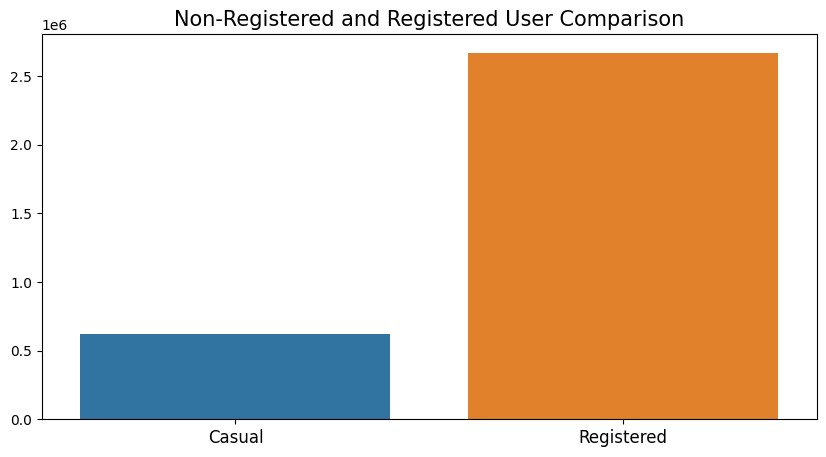

In [120]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=comparison_df.reset_index(),
    x="Type",
    y="Count"
)
plt.title("Non-Registered and Registered User Comparison", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Musim gugur merupakan musim terbanyak penyewaan sepeda, musim semi merupakan musim yang paling sedikit jumlah penyewaannya
- Untuk jumlah penyewaan di waktu hari, "Morning" dan "Evening" memiliki tren yang naik
- Perbandingan user casual dan registered sangat jauh

In [121]:
# Ekspor file csv yang sudah dibersikan
hour_df.to_csv("dashboard/hour.csv")
day_df.to_csv("dashboard/day.csv")

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Musim gugur merupakan musim dengan penyewaan sepeda terbanyak sehingga kita harus menaruh promo yang lumayan besar di musim gugur untuk meningkatkan pendapatan
- Conclution pertanyaan 2: Waktu pagi dan waktu sore menunjukkan jumlah penyewaan yang tinggi dikarenakan pagi adalah waktu berangkat kerja dan waktu sore merupakan waktu pulang kerja
- Conclution pertanyaan 3: Jumlah pemesanan dari user yang registered jauh lebih banyak dibandingkan dengan yang casual, untuk menarik para customer yang casual untuk menjadi member di penyewaan sepeda ini kita harus menyediakan promo promo (contohnya di konklusi pertanyaan 1) yang mana untuk menggunakan promo tersebut kita harus menjadi member atau register dulu ke dalam aplikasi penyewaan sepeda ini supaya jumlah pengguna meningkat yang mana berpengaruh juga untuk penghasilan perusahaan